<a href="https://colab.research.google.com/github/mrspatbile/python_for_finance/blob/main/PFF00_2_historical_vol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=7> Historical Volatility



# daily historical vol

In [32]:
import yfinance as yf
import pandas as pd

# Fetch data
ticker = "^GSPC"  # Yahoo Finance symbol for S&P 50
start_date = "2010-01-01"
end_date = "2024-11-30"
data = yf.download(ticker, start=start_date, end=end_date)

# closing prices
closing_prices = data['Close']
data = closing_prices[['^GSPC']]
data.dropna(inplace=True)
data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3753 entries, 2010-01-04 00:00:00+00:00 to 2024-11-29 00:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   3753 non-null   float64
dtypes: float64(1)
memory usage: 58.6 KB


In [35]:
# compute returns and vol
data['rets'] = np.log(data['^GSPC'] / data['^GSPC'].shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

In [25]:
data.head(2)

,^GSPC
Date,
2010-01-04 00:00:00+00:00,1132.98999
2010-01-05 00:00:00+00:00,1136.52002


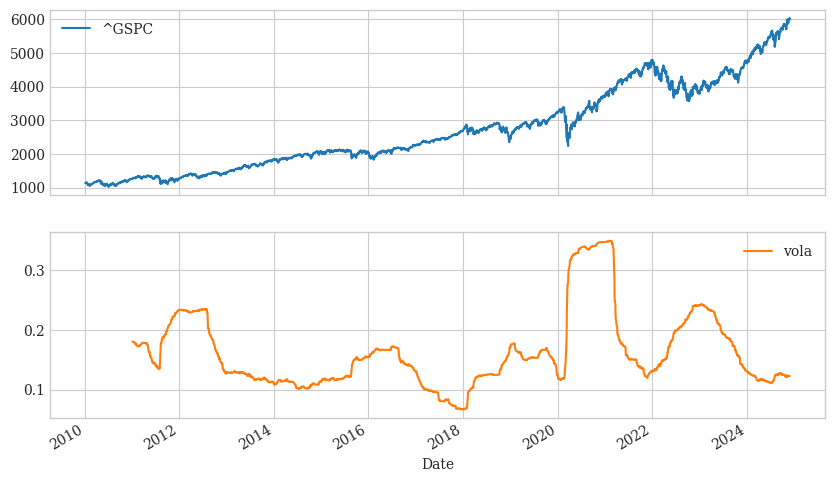

In [36]:
#plot setup
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'

# output plot
data[['^GSPC', 'vola']].plot(subplots=True, figsize=(10, 6));

## Exercise #1
Make a function to plot price and vol for any ticker. Test for another ticker.

In [45]:
def get_data(ticker, start_date, end_date):
  """downloads price and compute historical vol"""

  data = yf.download(ticker, start=start_date, end=end_date)

  # closing prices
  closing_prices = data['Close']
  data = closing_prices[[ticker]]
  data.dropna(inplace=True)

  # compute returns and vol
  data['rets'] = np.log(data[ticker] / data[ticker].shift(1))
  data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)
  return data

def plot_data(data, ticker):
  """plots price and vol"""
  data[[ticker, 'vola']].plot(subplots=True, figsize=(10, 6));

def plot_vol(ticker, start_date, end_date):
  data = get_data(ticker, start_date, end_date)
  plot_data(data, ticker)

[*********************100%***********************]  1 of 1 completed


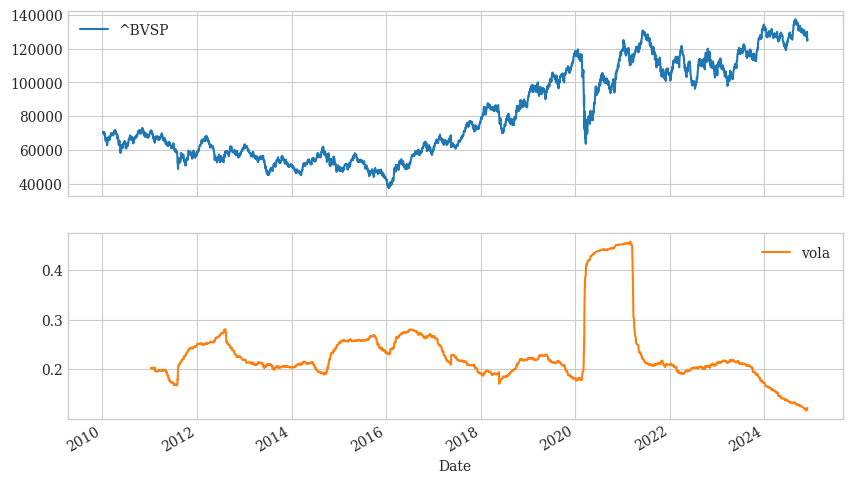

In [46]:
ticker = "^BVSP"  # Yahoo Finance symbol for S&P 50
start_date = "2010-01-01"
end_date = "2024-11-30"

plot_vol(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


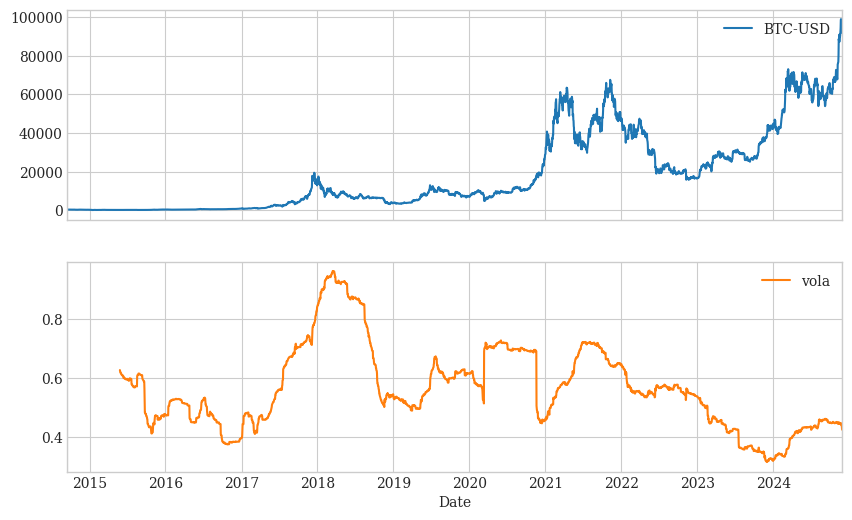

In [47]:
ticker = "BTC-USD"  # Yahoo Finance symbol for S&P 50
plot_vol(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


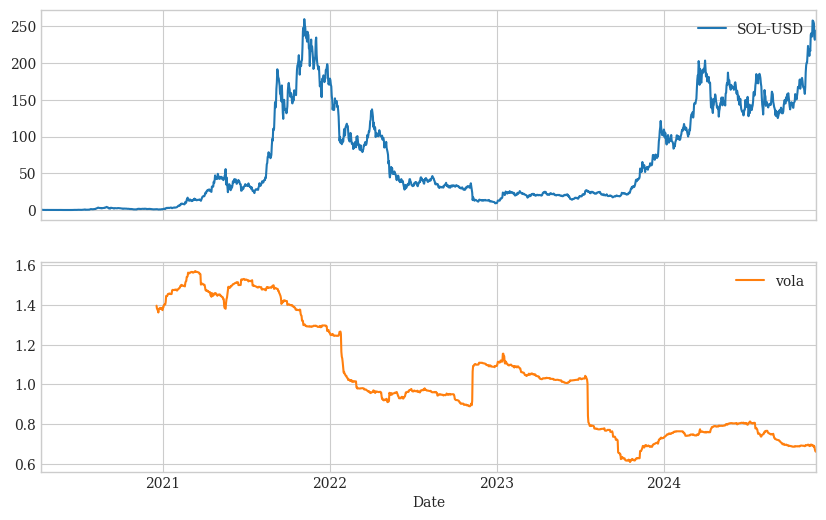

In [48]:
ticker = "SOL-USD"  # Yahoo Finance symbol for S&P 50
plot_vol(ticker, start_date, end_date)

# higher frequency data

Tick level not availabel in yfinance. The higher freqeuncy is 1 min, for max of 60 days.

In [76]:
import yfinance as yf
data = yf.download('DOGE-USD', period='5d', interval='1m')
data =  data[['Close']]
data.columns = data.columns.droplevel(1)
data.columns.name=''
data.dropna(inplace=True)
data.head(2)

[*********************100%***********************]  1 of 1 completed


,Close
Datetime,
2024-11-26 00:00:00+00:00,0.393289
2024-11-26 00:01:00+00:00,0.392735


In [87]:
# compute returns and vol
adj_vol_minutes = 60 * 24 * 365
data['rets'] = np.log(data['Close'] / data['Close'].shift(1))
data['vola'] = data['rets'].rolling(60 * 12).std() * np.sqrt(adj_vol_minutes)

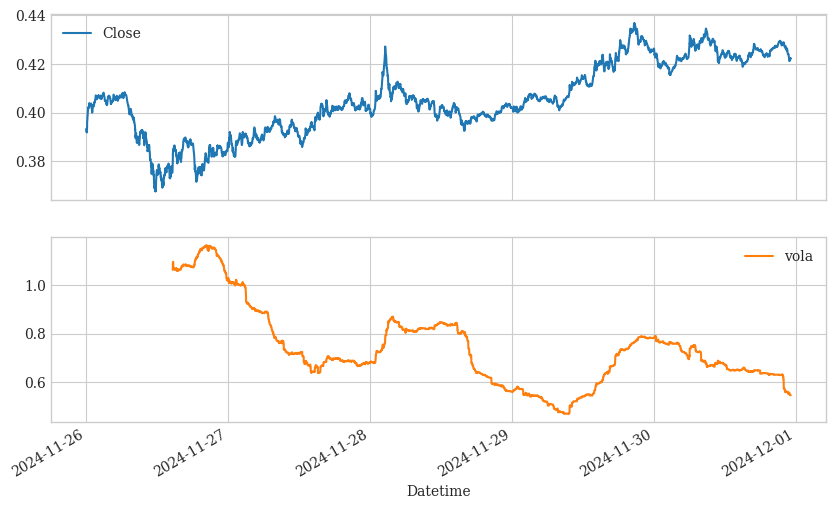

In [88]:
data[['Close', 'vola']].plot(subplots=True, figsize=(10, 6));
